<h2>Imports</h2>
<ul>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Scikit-Learn</li>
</ul>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import copy

# Scikit_Learn Imports
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron


<h2>Load Dataset</h2>

In [17]:
mnist = fetch_openml('mnist_784')

e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no3\.venv\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [18]:
X = mnist.data
y = mnist.target

<h2>Visualize Dataset</h2>
<ul>
    <li>Some of data</li>
    <li>Average data</li>
</ul>

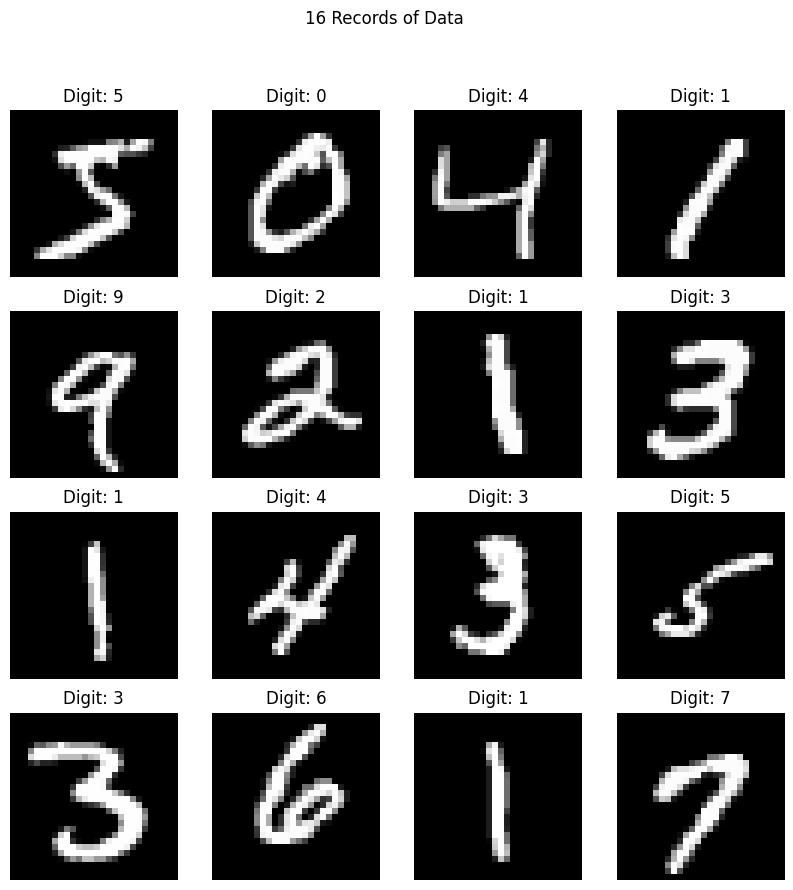

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image = X.iloc[i].values.reshape(28, 28)  # Reshaping flat imgae to its first shape
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Digit: {y[i]}")
    ax.axis('off')

plt.suptitle("16 Records of Data")
plt.show()

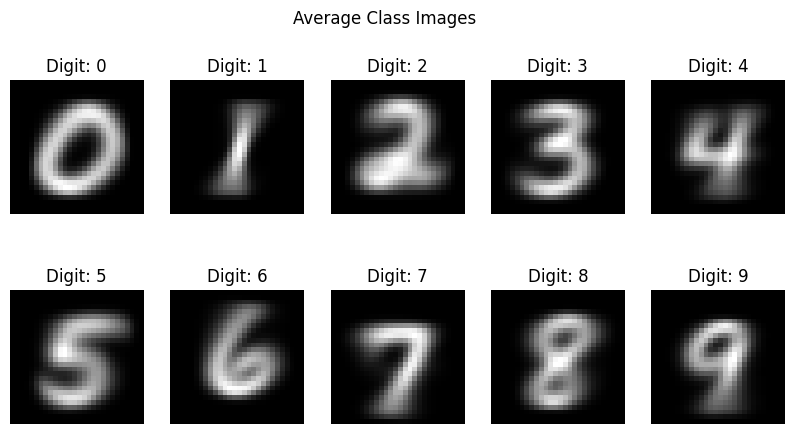

In [20]:

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for digit in range(10):
    # Extract all images for this digit
    digit_images = X[y == str(digit)]

    # Calculate the average image
    average_image = np.array(np.mean(digit_images, axis=0)).reshape(28, 28)

    # Plot the average image
    ax = axes[digit // 5, digit % 5]  # Calculate the grid index here
    ax.imshow(average_image, cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.suptitle("Average Class Images")
plt.show()


<h2>Preprocessing</h2>
<ul>
    <li>Missing Values (Already Done)</li>
    <li>Drop Duplicates (Already Done)</li>
    <li>Handle Categorical Feaetures (Already Done)</li>
    <li>Normalizing (Using Standard Normalization)</li>
</ul>
<h4><b>NOTE</b></h4>
<p>Preprocessing can be really chalenging on datasets but MNIST is a really famous and clean dataset so I just applied normalization before scalinng down data because of better perfomance of LDA with normalization and skiped other steps of pre processing</p>

In [21]:
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)

<h2>Split Train & Test data</h2>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(standard_X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Results
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 784)
(14000, 784)
(56000,)
(14000,)


<h2>Appling LDA</h2>
<p><b>Approach:</b> Scale down data to 2, 3, 4, ..., 9 and compare them</p>
<p><b>NOTE:</b> Original data dimension size is 784</p>

<h4>1. Scale down to 2 features</h4>

In [23]:
# Make an instance of LDA
lda_2 = LDA(n_components=2)

# Scaling down
X_train_lda_2 = lda_2.fit_transform(X_train, y_train)

rfk = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
accs_2 = []

# Get best model
best_model_2 = None
best_acc_2 = 0

for train_index, val_index in rfk.split(X_train):
    # Split data
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Train
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_fold_train, y_fold_train)

    # Evaluate
    preds = perceptron.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, preds)
    accs_2.append(acc)

    if acc > best_acc_2:
        best_model_2 = copy.deepcopy(perceptron)
        best_acc_2 = copy.deepcopy(acc)

<h4>2. Scale down to 3 features</h4>

In [24]:
# Make an instance of LDA
lda_3 = LDA(n_components=3)

# Scaling down
X_train_lda_3 = lda_3.fit_transform(X_train, y_train)

rfk = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
accs_3 = []

# Get best model
best_model_3 = None
best_acc_3 = 0

for train_index, val_index in rfk.split(X_train):
    # Split data
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Train
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_fold_train, y_fold_train)

    # Evaluate
    preds = perceptron.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, preds)
    accs_3.append(acc)

    if acc > best_acc_3:
        best_model_3 = copy.deepcopy(perceptron)
        best_acc_3 = copy.deepcopy(acc)

<h4>3. Scale down to 4 features</h4>

In [25]:
# Make an instance of LDA
lda_4 = LDA(n_components=4)

# Scaling down
X_train_lda_4 = lda_4.fit_transform(X_train, y_train)

rfk = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
accs_4 = []

# Get best model
best_model_4 = None
best_acc_4 = 0

for train_index, val_index in rfk.split(X_train):
    # Split data
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Train
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_fold_train, y_fold_train)

    # Evaluate
    preds = perceptron.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, preds)
    accs_4.append(acc)

    if acc > best_acc_4:
        best_model_4 = copy.deepcopy(perceptron)
        best_acc_4 = copy.deepcopy(acc)

<h4>4. Scale down to 5 features</h4>

In [26]:
# Make an instance of LDA
lda_5 = LDA(n_components=5)

# Scaling down
X_train_lda_5 = lda_5.fit_transform(X_train, y_train)

rfk = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
accs_5 = []

# Get best model
best_model_5 = None
best_acc_5 = 0

for train_index, val_index in rfk.split(X_train):
    # Split data
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Train
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_fold_train, y_fold_train)

    # Evaluate
    preds = perceptron.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, preds)
    accs_5.append(acc)

    if acc > best_acc_5:
        best_model_5 = copy.deepcopy(perceptron)
        best_acc_5 = copy.deepcopy(acc)

<h4>5. Scale down to 6 features</h4>

In [27]:
# Make an instance of LDA
lda_6 = LDA(n_components=6)

# Scaling down
X_train_lda_6 = lda_6.fit_transform(X_train, y_train)

rfk = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
accs_6 = []

# Get best model
best_model_6 = None
best_acc_6 = 0

for train_index, val_index in rfk.split(X_train):
    # Split data
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Train
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_fold_train, y_fold_train)

    # Evaluate
    preds = perceptron.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, preds)
    accs_6.append(acc)

    if acc > best_acc_6:
        best_model_6 = copy.deepcopy(perceptron)
        best_acc_6 = copy.deepcopy(acc)

<h4>6. Scale down to 7 features</h4>

In [28]:
# Make an instance of LDA
lda_7 = LDA(n_components=7)

# Scaling down
X_train_lda_7 = lda_7.fit_transform(X_train, y_train)

rfk = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
accs_7 = []

# Get best model
best_model_7 = None
best_acc_7 = 0

for train_index, val_index in rfk.split(X_train):
    # Split data
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Train
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_fold_train, y_fold_train)

    # Evaluate
    preds = perceptron.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, preds)
    accs_7.append(acc)

    if acc > best_acc_7:
        best_model_7 = copy.deepcopy(perceptron)
        best_acc_7 = copy.deepcopy(acc)

<h4>7. Scale down to 8 features</h4>

In [29]:
# Make an instance of LDA
lda_8 = LDA(n_components=8)

# Scaling down
X_train_lda_8 = lda_8.fit_transform(X_train, y_train)

rfk = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
accs_8 = []

# Get best model
best_model_8 = None
best_acc_8 = 0

for train_index, val_index in rfk.split(X_train):
    # Split data
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Train
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_fold_train, y_fold_train)

    # Evaluate
    preds = perceptron.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, preds)
    accs_8.append(acc)

    if acc > best_acc_8:
        best_model_8 = copy.deepcopy(perceptron)
        best_acc_8 = copy.deepcopy(acc)

<h4>8. Scale down to 9 features</h4>

In [30]:
# Make an instance of LDA
lda_9 = LDA(n_components=9)

# Scaling down
X_train_lda_9 = lda_9.fit_transform(X_train, y_train)

rfk = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
accs_9 = []

# Get best model
best_model_9 = None
best_acc_9 = 0

for train_index, val_index in rfk.split(X_train):
    # Split data
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Train
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_fold_train, y_fold_train)

    # Evaluate
    preds = perceptron.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, preds)
    accs_9.append(acc)

    if acc > best_acc_9:
        best_model_9 = copy.deepcopy(perceptron)
        best_acc_9 = copy.deepcopy(acc)

<h4>Boxplots of all dimensions</h4>

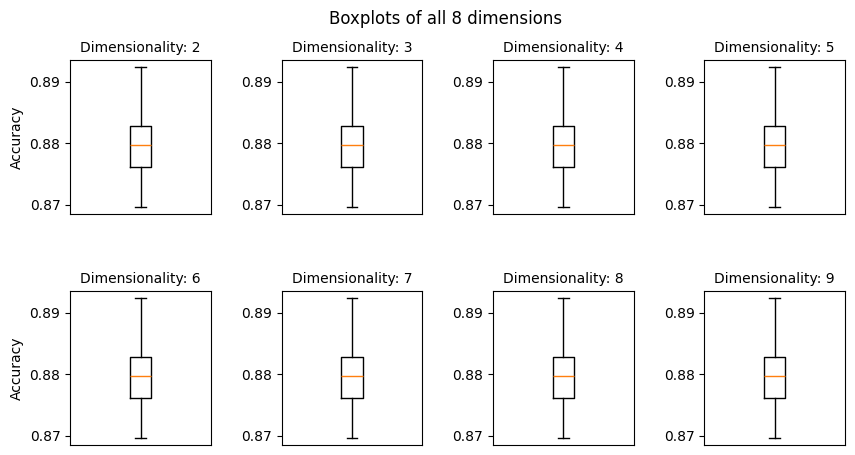

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
accs = [accs_2, accs_3, accs_4, accs_5, accs_6, accs_7, accs_8, accs_9] # To hold accuracies
for i, ax in enumerate(axes.flat):
    ax.boxplot(accs[i])
    ax.xaxis.set_visible(False)
    ax.set_title(f"Dimensionality: {i+2}", fontdict={'fontsize': 10})
    # ax.set_ylabel("Accuracy", fontdict={'fontsize': 8})
axes[0, 0].set_ylabel("Accuracy")
axes[1, 0].set_ylabel("Accuracy")
plt.suptitle("Boxplots of all 8 dimensions")
plt.show()


In [44]:
for i in accs:
    print(i)

[0.87625, 0.8825, 0.8826785714285714, 0.8749107142857143, 0.8876785714285714, 0.8704464285714286, 0.8775892857142857, 0.8735714285714286, 0.8799107142857143, 0.8794642857142857, 0.8770535714285714, 0.8866071428571428, 0.8855357142857143, 0.8807142857142857, 0.87625, 0.8824107142857143, 0.8924107142857143, 0.8811607142857143, 0.8775892857142857, 0.8782142857142857, 0.8782142857142857, 0.8758928571428571, 0.8827678571428571, 0.8761607142857143, 0.8839285714285714, 0.8732142857142857, 0.8757142857142857, 0.8796428571428572, 0.8846428571428572, 0.8833035714285714, 0.8869642857142858, 0.8710714285714286, 0.88, 0.8739285714285714, 0.8696428571428572, 0.875625, 0.8872321428571428, 0.8835714285714286, 0.8777678571428571, 0.8820535714285714, 0.8794642857142857, 0.871875, 0.8840178571428572, 0.8817857142857143, 0.8847321428571429, 0.8814285714285715, 0.8714285714285714, 0.8813392857142858, 0.8802678571428572, 0.8770535714285714]
[0.87625, 0.8825, 0.8826785714285714, 0.8749107142857143, 0.8876785